# IN_SYS - SW12 Exercise 1

## MNIST digits recognition with Keras CNN

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

## Preprocess data

In [3]:
# Reshape to add channel dimension (28, 28, 1) for grayscale
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

# Convert labels to one-hot encoding
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

print(f"Training data shape: {x_train.shape}")
print(f"Test data shape: {x_test.shape}")
print(f"Training labels shape: {y_train.shape}")

Training data shape: (60000, 28, 28, 1)
Test data shape: (10000, 28, 28, 1)
Training labels shape: (60000, 10)


## We will build CNN model using Keras Sequential model

### Input → Conv2D → MaxPool → Conv2D → MaxPool → Flatten → Dense → Dropout → Dense → Softmax

In [6]:
# Build the CNN model
model = keras.Sequential([
    layers.Input(shape=(28, 28, 1)),
    
    # First convolutional block
    layers.Conv2D(48, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    # Second convolutional block  
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    # Flatten and fully connected layers
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),  # Regularization
    
    # Output layer with softmax
    layers.Dense(10, activation='softmax')
])

# Display model architecture
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 28, 28, 48)     │           480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 14, 14, 48)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 14, 14, 32)     │        13,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1568)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │       100,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 115,402 (450.79 KB)

 Trainable params: 115,402 (450.79 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

## Training the model - monitor the validation accuracy and validation loss function

In [11]:
# Train the model
history = model.fit(
    x_train, y_train,
    batch_size=64,
    epochs=5,   # this could be prolonged for more epochs, as long as we see there is convergence
    validation_split=0.1,  # Use 10% of training as validation
    verbose=1
)

Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 18s 21ms/step - accuracy: 0.9709 - loss: 0.1195 - val_accuracy: 0.9895 - val_loss: 0.0452
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 18s 21ms/step - accuracy: 0.9720 - loss: 0.1149 - val_accuracy: 0.9895 - val_loss: 0.0561
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 18s 22ms/step - accuracy: 0.9728 - loss: 0.1149 - val_accuracy: 0.9882 - val_loss: 0.0589
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 18s 22ms/step - accuracy: 0.9735 - loss: 0.1109 - val_accuracy: 0.9917 - val_loss: 0.0545
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 19s 22ms/step - accuracy: 0.9736 - loss: 0.1214 - val_accuracy: 0.9875 - val_loss: 0.0676


## Model evaluation on test data, and visualization of predictions


Test accuracy: 0.9862
Test loss: 0.0512


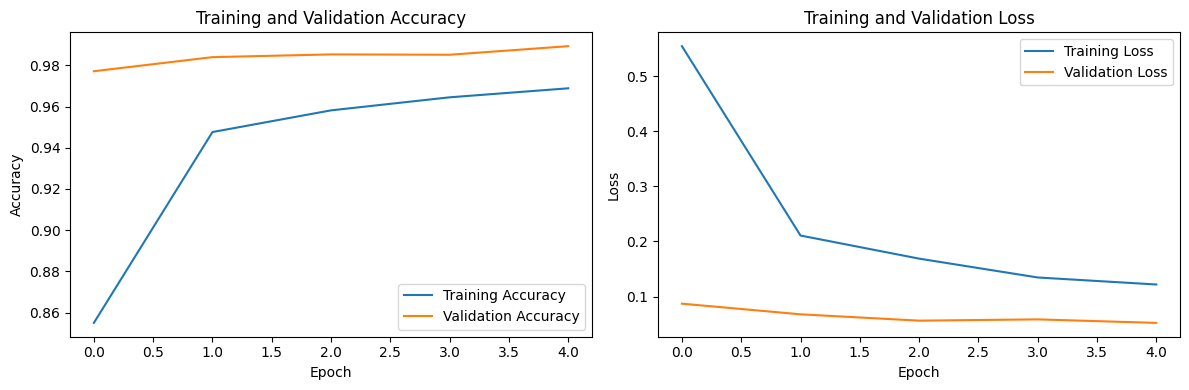

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


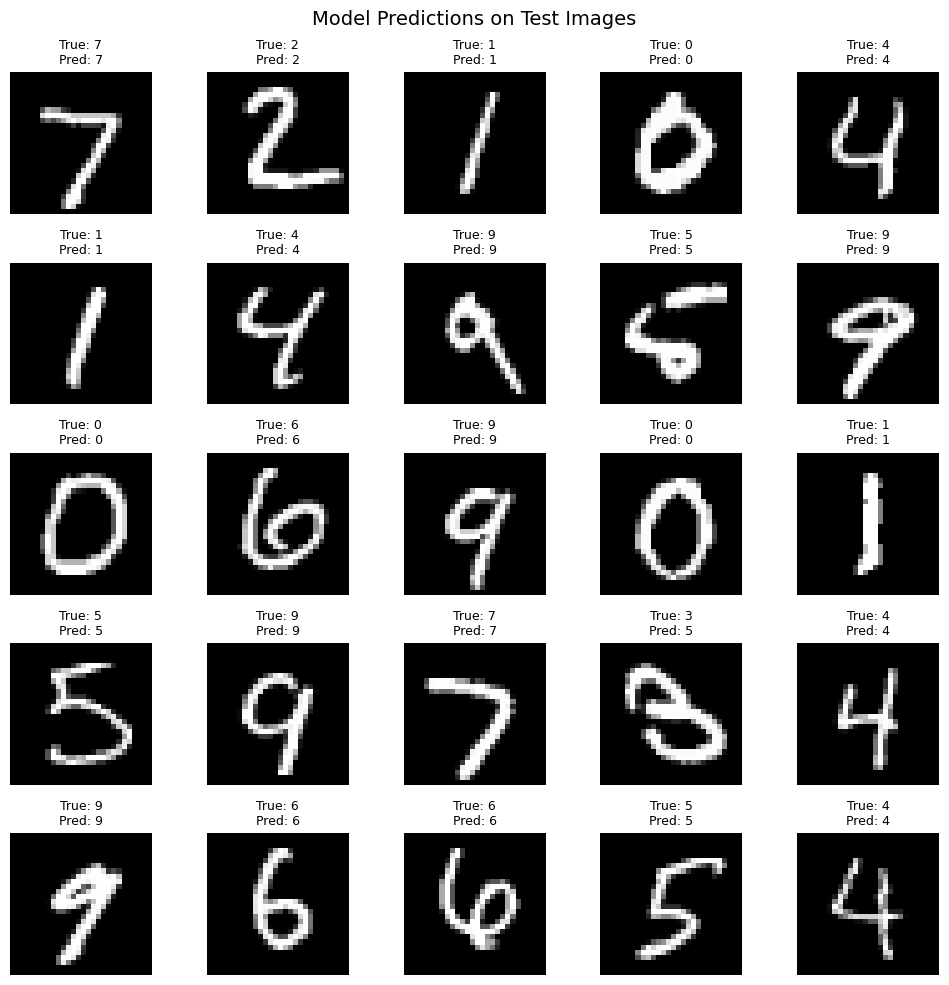

In [10]:
# Evaluate on test data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"\nTest accuracy: {test_acc:.4f}")
print(f"Test loss: {test_loss:.4f}")

# Visualize training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.tight_layout()
plt.show()

# Make predictions and visualize results
predictions = model.predict(x_test[:25])
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test[:25], axis=1)

# Visualize predictions
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f'True: {true_labels[i]}\nPred: {predicted_labels[i]}', fontsize=9)
    plt.axis('off')
plt.suptitle('Model Predictions on Test Images', fontsize=14)
plt.tight_layout()
plt.show()

In [12]:
model.save('MNIST_Keras_model.keras')